In [ ]:
import tensorflow as tf
print(tf.__version__)

2.17.1


# **Building Neural Network with Churn Modelling Dataset**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [ ]:
dataset = pd.read_csv("Churn_Modelling.csv")
dataset.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
#Divide the Dataset into independent and dependent

X = dataset.iloc[:,3:13]
y = dataset.iloc[:,13]

X.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,Female,42,2,0.00,1,1,1,101348.88
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,502,France,Female,42,8,159660.80,3,1,0,113931.57
3,699,France,Female,39,1,0.00,2,0,0,93826.63
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10


In [ ]:
y

,Exited
0,1
1,0
2,1
3,0
4,0
...,...
9995,0
9996,0
9997,1
9998,1


In [ ]:
#Feature Engineering
geography = pd.get_dummies(X['Geography'],drop_first = True)
geography



,Germany,Spain
0,False,False
1,False,True
2,False,False
3,False,False
4,False,True
...,...,...
9995,False,False
9996,False,False
9997,False,False
9998,True,False


In [ ]:
Gender = pd.get_dummies(X['Gender'],drop_first = True)
Gender

,Male
0,False
1,False
2,False
3,False
4,False
...,...
9995,True
9996,True
9997,False
9998,True


In [ ]:
X = X.drop(['Geography','Gender'],axis=1)

In [ ]:
X.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,42,2,0.00,1,1,1,101348.88
1,608,41,1,83807.86,1,0,1,112542.58
2,502,42,8,159660.80,3,1,0,113931.57
3,699,39,1,0.00,2,0,0,93826.63
4,850,43,2,125510.82,1,1,1,79084.10


In [ ]:
X = pd.concat([X,geography,Gender],axis=1)

In [ ]:
X.shape

(10000, 11)

In [ ]:
#splitting the dataset into training set and test set


from sklearn.model_selection import train_test_split

X_train,X_test,Y_train,Y_test = train_test_split(X,y,test_size =0.2,random_state =0)

In [ ]:
#feature Scaling

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
X_train

array([[ 0.16958176, -0.46460796,  0.00666099, ..., -0.5698444 ,
         1.74309049, -1.09168714],
       [-2.30455945,  0.30102557, -1.37744033, ...,  1.75486502,
        -0.57369368,  0.91601335],
       [-1.19119591, -0.94312892, -1.031415  , ..., -0.5698444 ,
        -0.57369368, -1.09168714],
       ...,
       [ 0.9015152 , -0.36890377,  0.00666099, ..., -0.5698444 ,
        -0.57369368,  0.91601335],
       [-0.62420521, -0.08179119,  1.39076231, ..., -0.5698444 ,
         1.74309049, -1.09168714],
       [-0.28401079,  0.87525072, -1.37744033, ...,  1.75486502,
        -0.57369368, -1.09168714]])

In [ ]:
X_test

array([[-0.55204276, -0.36890377,  1.04473698, ...,  1.75486502,
        -0.57369368, -1.09168714],
       [-1.31490297,  0.10961719, -1.031415  , ..., -0.5698444 ,
        -0.57369368, -1.09168714],
       [ 0.57162971,  0.30102557,  1.04473698, ..., -0.5698444 ,
         1.74309049, -1.09168714],
       ...,
       [-0.74791227, -0.27319958, -1.37744033, ..., -0.5698444 ,
         1.74309049,  0.91601335],
       [-0.00566991, -0.46460796, -0.33936434, ...,  1.75486502,
        -0.57369368,  0.91601335],
       [-0.79945688, -0.84742473,  1.04473698, ...,  1.75486502,
        -0.57369368,  0.91601335]])

In [ ]:
X_train.shape

(8000, 11)

In [ ]:
### Create the ANN

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LeakyReLU,PReLU,ELU,ReLU
from tensorflow.keras.layers import Dropout

In [ ]:
#lets initialize the ANN

classifier = Sequential()

In [ ]:
#Adding the input layer

classifier.add(Dense(units = 11,activation ='relu'))

In [ ]:
#Adding the first hidden layer
classifier.add(Dense(units = 7,activation ='relu'))



In [ ]:
#Adding the second hidden layer

classifier.add(Dense(units = 6,activation ='relu'))

In [ ]:
#Adding the output layer

classifier.add(Dense(units=1,activation ='sigmoid'))

In [ ]:
import tensorflow
opt = tensorflow.keras.optimizers.Adam(learning_rate=0.01)

In [ ]:
classifier.compile(optimizer =opt,loss ='binary_crossentropy',metrics =['accuracy'])

In [ ]:
#Early Stopping

import tensorflow as tf
early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor ="val_loss",
    min_delta = 0.0001,
    patience = 20,
    verbose = 1,
    mode = "auto",
    baseline = None,
    restore_best_weights = False,
)

In [ ]:
model_history = classifier.fit(X_train,Y_train,validation_split=0.33,batch_size=10,epochs = 1000,callbacks = early_stopping)

Epoch 1/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.8073 - loss: 0.4558 - val_accuracy: 0.8368 - val_loss: 0.3926
Epoch 2/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8511 - loss: 0.3676 - val_accuracy: 0.8391 - val_loss: 0.3789
Epoch 3/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8553 - loss: 0.3569 - val_accuracy: 0.8485 - val_loss: 0.3593
Epoch 4/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8593 - loss: 0.3521 - val_accuracy: 0.8565 - val_loss: 0.3598
Epoch 5/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8503 - loss: 0.3467 - val_accuracy: 0.8459 - val_loss: 0.3692
Epoch 6/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8560 - loss: 0.3445 - val_accuracy: 0.8519 - val_loss: 0.3580
Epoch 7/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8666 - loss: 0.3252 - val_accuracy: 0.8432 - val_loss: 0.3992
Epoch 8/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8566 - loss: 0.3398 - 

In [ ]:
model_history.history.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

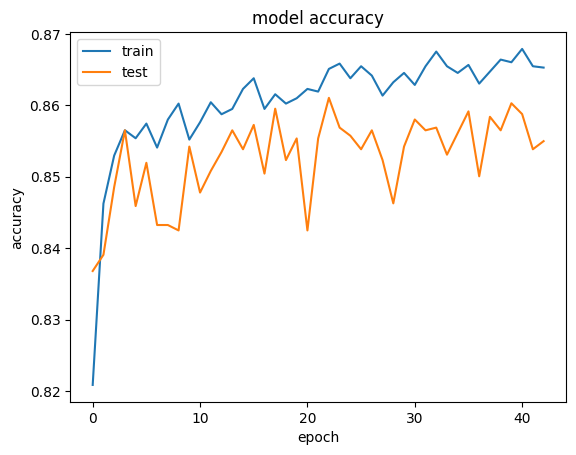

In [ ]:
#summarize history for accuracy
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'],loc ='upper left')
plt.show()



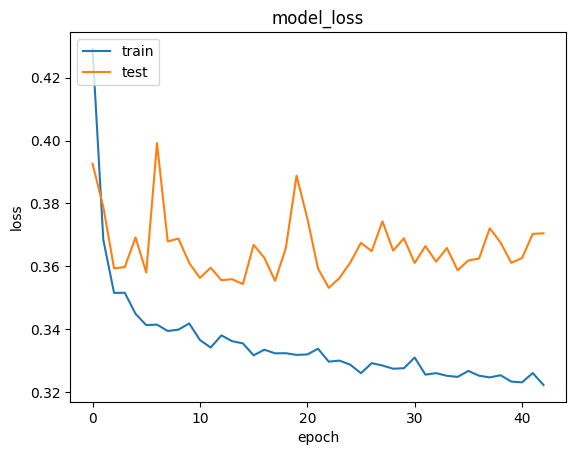

In [ ]:
#Summarize History for Loss

plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model_loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'],loc = 'upper left')
plt.show()

In [ ]:
#Making Predictions and evaluating the model

#predicting the test set results

y_pred = classifier.predict(X_test)
y_pred = (y_pred >- 0.5)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


In [ ]:
#Make the confusion matrix

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test,y_pred)
cm


array([[   0, 1595],
       [   0,  405]])

0.2025

# **Building  Image Classifier using Sequential API on Fashion Mnist Dataset**

In [ ]:
#Load the Dataset

import tensorflow as tf

fashion_mnist = tf.keras.datasets.fashion_mnist.load_data()

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 1us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
(X_train_full , y_train_full),(X_test,y_test) = fashion_mnist

In [ ]:
#Split the training & Validation set
#This dataset is already split into training set (60,000 images) and test set (10,000 images)


#Holding out the last 5000 images from training set for validation
X_train ,  y_train = X_train_full[:-5000],y_train_full[:-5000]

#Using the last 5000 for validation
X_valid,y_valid = X_train_full[-5000:],y_train_full[-5000:]

In [ ]:
X_train.shape

(55000, 28, 28)

In [ ]:
X_train.dtype

dtype('uint8')

In [ ]:
X_train , X_valid , X_test = X_train/255. , X_valid / 255. , X_test / 255.

In [ ]:
class_names = ["T-shirt/top","Trouser","Pullover","Dress","Coat","Sandal","Shirt","Sneaker","Bag","Ankle boot"]

In [ ]:
class_names[y_train[0]]

'Ankle boot'

In [ ]:
#Building the Neural Network

tf.random.set_seed(42)

model = tf.keras.Sequential()
#Input Layer
model.add(tf.keras.layers.Flatten(input_shape =[28,28]))

#1st Dense Hidden Layer with 300 neurons
model.add(tf.keras.layers.Dense(300,activation ="relu"))

#2nd Dense Hidden Layer with 100 neurons
model.add(tf.keras.layers.Dense(100,activation ="relu"))

# Output Layer with 10 neurons (one per class)
model.add(tf.keras.layers.Dense(10,activation="softmax"))


/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
#Displaying the Summary

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten (Flatten)                    │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 300)                 │         235,500 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 100)                 │          30,100 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 10)                  │           1,010 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 266,610 (1.02 MB)

 Trainable params: 266,610 (1.02 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.layers

[<Flatten name=flatten, built=True>,
 <Dense name=dense, built=True>,
 <Dense name=dense_1, built=True>,
 <Dense name=dense_2, built=True>]

In [ ]:
hidden1 = model.layers[1]
hidden1.name

'dense'

In [ ]:
model.get_layer('dense')is hidden1

True

In [ ]:
weights, biases = hidden1.get_weights()
weights

array([[-0.03241014,  0.06113784, -0.00704881, ..., -0.07405841,
         0.03215759,  0.00433497],
       [ 0.01330203, -0.00367555, -0.06781396, ..., -0.0397782 ,
         0.00158025, -0.01884846],
       [-0.0529739 ,  0.02914262, -0.05267919, ...,  0.0319079 ,
        -0.02318607,  0.00363755],
       ...,
       [-0.06747038, -0.06348842, -0.02056018, ...,  0.05540711,
        -0.00504502,  0.06731385],
       [-0.05500083, -0.0195977 , -0.05577638, ..., -0.00370277,
        -0.00942268,  0.00812184],
       [ 0.0654355 ,  0.04918469, -0.01033279, ..., -0.02549737,
         0.03996534, -0.04689915]], dtype=float32)

In [ ]:
weights.shape

(784, 300)

In [ ]:
biases

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [ ]:
biases.shape

(300,)

In [ ]:
model.compile(loss ="sparse_categorical_crossentropy",optimizer ="sgd",metrics =["accuracy"])

In [ ]:
history = model.fit(X_train , y_train , epochs = 30, validation_data =(X_valid,y_valid))

Epoch 1/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.6800 - loss: 1.0237 - val_accuracy: 0.8280 - val_loss: 0.5069
Epoch 2/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8258 - loss: 0.5074 - val_accuracy: 0.8376 - val_loss: 0.4534
Epoch 3/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.8422 - loss: 0.4522 - val_accuracy: 0.8444 - val_loss: 0.4299
Epoch 4/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8527 - loss: 0.4214 - val_accuracy: 0.8518 - val_loss: 0.4133
Epoch 5/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8593 - loss: 0.3997 - val_accuracy: 0.8554 - val_loss: 0.4018
Epoch 6/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8659 - loss: 0.3828 - val_accuracy: 0.8564 - val_loss: 0.3920
Epoch 7/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8707 - loss: 0.3688 - val_accuracy: 0.8630 - val_loss: 0.3842
Epoch 8/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.8737 - loss: 0.3567 - 

In [ ]:
history.history.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

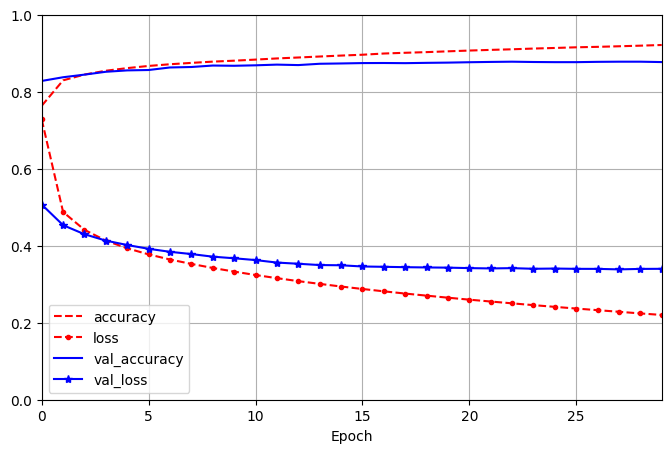

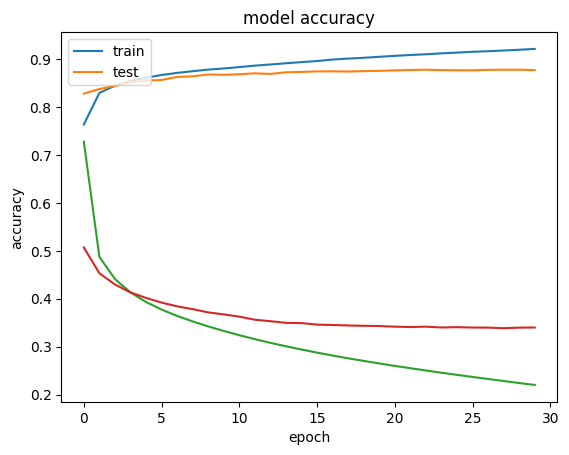

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
pd.DataFrame(history.history).plot(figsize=(8,5),xlim =[0,29],ylim =[0,1],grid=True,xlabel ="Epoch",style=["r--","r--.","b-","b-*"])
plt.show()

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'],loc ='upper left')
plt.show()


In [ ]:
model.evaluate(X_test,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8747 - loss: 0.3605


[0.35999032855033875, 0.8751000165939331]

In [ ]:
X_new = X_test[:3]
y_proba = model.predict(X_new)
y_proba.round(2)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 128ms/step


array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.11, 0.  , 0.02, 0.  , 0.87],
       [0.  , 0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ]],
      dtype=float32)

In [ ]:
import numpy as np

y_pred = y_proba.argmax(axis = -1)
y_pred


array([9, 2, 1])

In [ ]:
np.array(class_names)[y_pred]

array(['Ankle boot', 'Pullover', 'Trouser'], dtype='<U11')

In [ ]:
y_new = y_test[:3]
y_new

array([9, 2, 1], dtype=uint8)

# **Regression MLP with Sequential** **API**

In [3]:
import tensorflow as tf

California_Housing = tf.keras.datasets.california_housing.load_data()

743530/743530 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [4]:
(X_train_full , y_train_full),(X_test,y_test) = California_Housing

In [5]:
#Split the training & Validation set
#This dataset is already split into training set (60,000 images) and test set (10,000 images)


#Holding out the last 5000 images from training set for validation
X_train ,  y_train = X_train_full[:-5000],y_train_full[:-5000]

#Using the last 5000 for validation
X_valid,y_valid = X_train_full[-5000:],y_train_full[-5000:]

In [6]:
X_train.shape

(11512, 8)

In [7]:
X_train.dtype

dtype('float32')

In [8]:
#Building the Neural Network
import tensorflow as tf

tf.random.set_seed(42)
norm_layer = tf.keras.layers.Normalization(input_shape = X_train.shape[1:])
model = tf.keras.Sequential([
    norm_layer,
    tf.keras.layers.Dense(50,activation ="relu"),
    tf.keras.layers.Dense(50,activation ="relu"),
    tf.keras.layers.Dense(50,activation ="relu"),
    tf.keras.layers.Dense(1)
])


/usr/local/lib/python3.10/dist-packages/keras/src/layers/preprocessing/tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [9]:
optimizer = tf.keras.optimizers.Adam(learning_rate =1e-3)

In [10]:
model.compile(loss ="mse",optimizer = optimizer, metrics= ["RootMeanSquaredError"])


In [11]:
norm_layer.adapt(X_train)

In [12]:
history = model.fit(X_train , y_train, epochs = 20, validation_data =(X_valid,y_valid))

Epoch 1/20
360/360 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - RootMeanSquaredError: 234062.2656 - loss: 54790660096.0000 - val_RootMeanSquaredError: 193724.9688 - val_loss: 37529362432.0000
Epoch 2/20
360/360 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - RootMeanSquaredError: 157900.6406 - loss: 25213722624.0000 - val_RootMeanSquaredError: 105852.8828 - val_loss: 11204833280.0000
Epoch 3/20
360/360 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - RootMeanSquaredError: 104239.9141 - loss: 10877813760.0000 - val_RootMeanSquaredError: 90480.7734 - val_loss: 8186770432.0000
Epoch 4/20
360/360 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - RootMeanSquaredError: 91255.9922 - loss: 8333843456.0000 - val_RootMeanSquaredError: 81611.1172 - val_loss: 6660375040.0000
Epoch 5/20
360/360 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - RootMeanSquaredError: 82969.7266 - loss: 6888295936.0000 - val_RootMeanSquaredError: 75722.2578 - val_loss: 5733860864.0000
Epoch 6/20
360/360 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - RootMeanSquaredError: 77411.4453 - loss: 59958

In [13]:
mse_test = model.evaluate(X_test,y_test)

129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - RootMeanSquaredError: 69476.0781 - loss: 4828904448.0000


In [14]:
X_new = X_test[:3]
y_pred = model.predict(X_new)
y_pred

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step


array([[231678.36],
       [294165.78],
       [190762.45]], dtype=float32)

# **Building Complex Model Using Functional API**

In [1]:
import tensorflow as tf

normalization_layer = tf.keras.layers.Normalization()
hidden_layer1 = tf.keras.layers.Dense(30,activation ="relu")
hidden_layer2 = tf.keras.layers.Dense(30,activation="relu")
concat_layer = tf.keras.layers.Concatenate()
output_layers = tf.keras.layers.Dense(1)

In [15]:
input = tf.keras.layers.Input(shape = X_train.shape[1:])
normalized = normalization_layer(input)
hidden1 = hidden_layer1(normalized)
hidden2 = hidden_layer2(hidden1)
concat = concat_layer([normalized,hidden2])
output = output_layers(concat)

model = tf.keras.Model(inputs = [input], outputs = [output])

In [16]:
optimizer = tf.keras.optimizers.Adam(learning_rate = 1e-3)



In [17]:
model.compile(loss ="mse",optimizer = optimizer, metrics = ["RootMeanSquaredError"])

In [18]:
normalization_layer.adapt(X_train)

In [19]:
history = model.fit(X_train, y_train, epochs = 20, validation_data =(X_valid,y_valid))

Epoch 1/20
360/360 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - RootMeanSquaredError: 235639.2031 - loss: 55529578496.0000 - val_RootMeanSquaredError: 236737.7656 - val_loss: 56044769280.0000
Epoch 2/20
360/360 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - RootMeanSquaredError: 234946.1875 - loss: 55203061760.0000 - val_RootMeanSquaredError: 234335.0000 - val_loss: 54912888832.0000
Epoch 3/20
360/360 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - RootMeanSquaredError: 231694.1406 - loss: 53685084160.0000 - val_RootMeanSquaredError: 228286.4219 - val_loss: 52114690048.0000
Epoch 4/20
360/360 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - RootMeanSquaredError: 224595.8594 - loss: 50446303232.0000 - val_RootMeanSquaredError: 218090.8750 - val_loss: 47563632640.0000
Epoch 5/20
360/360 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - RootMeanSquaredError: 213415.5000 - loss: 45549850624.0000 - val_RootMeanSquaredError: 204219.4531 - val_loss: 41705586688.0000
Epoch 6/20
360/360 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - RootMeanSquaredError: 198863.0469 - 

In [20]:
mse_test = model.evaluate(X_test,y_test)

129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - RootMeanSquaredError: 92126.0703 - loss: 8494076416.0000


**Handling Multiple Inputs**

In [36]:
import tensorflow as tf


input_wide = tf.keras.layers.Input(shape =[5])
input_deep = tf.keras.layers.Input(shape =[6])

norm_layer_wide = tf.keras.layers.Normalization()
norm_layer_deep = tf.keras.layers.Normalization()

norm_wide = norm_layer_wide(input_wide)
norm_deep = norm_layer_deep(input_deep)

hidden1 = tf.keras.layers.Dense(30,activation ="relu")(norm_deep)
hidden2 = tf.keras.layers.Dense(30,activation ="relu")(hidden1)

concat = tf.keras.layers.Concatenate()([norm_wide,hidden2])

output = tf.keras.layers.Dense(1)(concat)

model = tf.keras.Model(inputs =[input_wide, input_deep], outputs =[output])

In [37]:
optimizer = tf.keras.optimizers.Adam(learning_rate = 1e-3)

In [38]:
model.compile(loss ="mse",optimizer = optimizer, metrics =["RootMeanSquaredError"])

In [39]:
X_train_wide , X_train_deep = X_train[:,:5],X_train[:,2:]
X_valid_wide,  X_valid_deep = X_valid[:,:5],X_valid[:,2:]

X_test_wide, X_test_deep = X_test[:,:5],X_test[:,2:]
X_new_wide, X_new_deep = X_test_wide[:3], X_test_deep[:3]





In [40]:
norm_layer_wide.adapt(X_train_wide)
norm_layer_deep.adapt(X_train_deep)


In [41]:
history = model.fit((X_train_wide,X_train_deep),y_train,epochs=20,validation_data =((X_valid_wide,X_valid_deep),y_valid))

Epoch 1/20
360/360 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - RootMeanSquaredError: 235644.0156 - loss: 55531851776.0000 - val_RootMeanSquaredError: 236803.2500 - val_loss: 56075776000.0000
Epoch 2/20
360/360 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - RootMeanSquaredError: 235090.5938 - loss: 55271010304.0000 - val_RootMeanSquaredError: 234839.8750 - val_loss: 55149764608.0000
Epoch 3/20
360/360 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - RootMeanSquaredError: 232435.0469 - loss: 54029041664.0000 - val_RootMeanSquaredError: 229824.1094 - val_loss: 52819120128.0000
Epoch 4/20
360/360 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - RootMeanSquaredError: 226557.0000 - loss: 51331018752.0000 - val_RootMeanSquaredError: 221219.6406 - val_loss: 48938127360.0000
Epoch 5/20
360/360 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - RootMeanSquaredError: 217108.2500 - loss: 47139450880.0000 - val_RootMeanSquaredError: 209200.2500 - val_loss: 43764744192.0000
Epoch 6/20
360/360 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - RootMeanSquaredError: 204450.2344 - 

In [42]:
mse_test = model.evaluate((X_test_wide, X_test_deep),y_test)

129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - RootMeanSquaredError: 100208.9688 - loss: 10050010112.0000


In [43]:
y_pred = model.predict((X_new_wide,X_new_deep))
y_pred

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step


array([[173026.89],
       [147188.53],
       [202874.89]], dtype=float32)